<a href="https://colab.research.google.com/github/codeboy47/Coronavirus-Tweet-Sentiment-Analysis/blob/main/Individual_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

## Libraries

In [33]:
# Import package
import pandas as pd
import numpy as np
import ast
import string
from datetime import datetime as dt
from datetime import date
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.style as style
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [34]:
# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [35]:
# Import Sklearn Libraries
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [36]:
## Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data

In [38]:
# loading csv File
file_path = '/content/drive/MyDrive/Coronavirus Tweet Sentiment Analysis/Coronavirus Tweets.csv'
tweet_df = pd.read_csv(file_path, index_col = False, encoding='latin1')

In [39]:
# printing shape of the dataset
print("Shape of the Dataset:", tweet_df.shape)

Shape of the Dataset: (41157, 6)


In [40]:
# Using head function to get first 5 rows
tweet_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [41]:
# using tail with a transpose to get the view of columns
tweet_df.tail().T

,41152,41153,41154,41155,41156
UserName,44951,44952,44953,44954,44955
ScreenName,89903,89904,89905,89906,89907
Location,"Wellington City, New Zealand",NaN,NaN,NaN,i love you so much || he/him
TweetAt,14-04-2020,14-04-2020,14-04-2020,14-04-2020,14-04-2020
OriginalTweet,Airline pilots offering to stock supermarket s...,Response to complaint not provided citing COVI...,You know itÂs getting tough when @KameronWild...,Is it wrong that the smell of hand sanitizer i...,@TartiiCat Well new/used Rift S are going for ...
Sentiment,Neutral,Extremely Negative,Positive,Neutral,Negative


In [42]:
# get the info of datasets
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [43]:
# checking if any null values are present in our dataset
count_of_null_values = tweet_df.isnull().sum()
count_of_null_values

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

Here we see Location column has around eight thousand five hundred null values.
<br><br>
#### **We don't have to remove the null values of Location column because we have to classify the tweet on the basis of the text present in the OriginalTweet column. Also we don't want to loose the important information present in the dataset as that might hamper the performance of our model.**

In [44]:
# checking duplicates in our dataset
value = len(tweet_df[tweet_df.duplicated()])
print("Total no. of duplicates = ", value)

Total no. of duplicates =  0


As we can see there are no duplicates in our dataset

In [45]:
# Setting the size of the graphs and also style of seaborn
style.use('seaborn-poster')
style.use('ggplot')
sns.set(style = 'darkgrid')

<br>

# **Understanding the features of our dataset**

### Finding the number of unique users that tweeted during covid

In [46]:
# no. of unique users
tweet_df['UserName'].nunique()

41157

In [47]:
# no. of records
tweet_df.shape[0]

41157

Inference: <br>
As we can see, the number of unique users is the same as the total number of observations. 
<br>
This means the dataset contains one tweet per user.

## Count of tweets as per sentiment

In [48]:
# Grouping sentiments according to user count
sentiment_frequency = tweet_df.groupby(['Sentiment'], as_index = False).agg({'UserName': 'count'}).rename(columns = {'UserName' : 'frequency'})
sentiment_frequency

,Sentiment,frequency
0,Extremely Negative,5481
1,Extremely Positive,6624
2,Negative,9917
3,Neutral,7713
4,Positive,11422


Text(0, 0.5, 'Count')

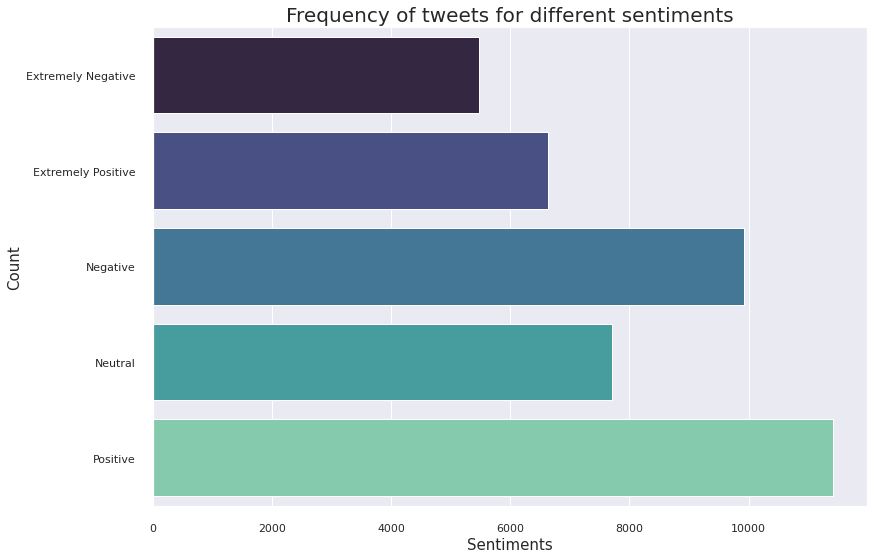

In [49]:
# setting seaborn plotting aesthetics for creating a bar chart
sns.barplot(
    x = 'frequency',
    y = 'Sentiment',
    data = sentiment_frequency,
    palette = ('mako'),
    orient = 'horizontal'
)
plt.title('Frequency of tweets for different sentiments', fontsize = 20)
plt.xlabel('Sentiments', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Inference: <br>
From the graph we can see most of the tweets are positive followed by negative tweets.

### Merging the classes Extremely Positive and Extremely Negative into Positive and Negative classes respectively.

In [50]:
# Creating three classes i.e Positive, Negative and Neutral
values = {
    'Sentiment': {'Extremely Negative': 'Negative', 'Extremely Positive': 'Positive'}
}
tweet_df.replace(values, inplace = True)

In [51]:
tweet_df['Sentiment'].value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

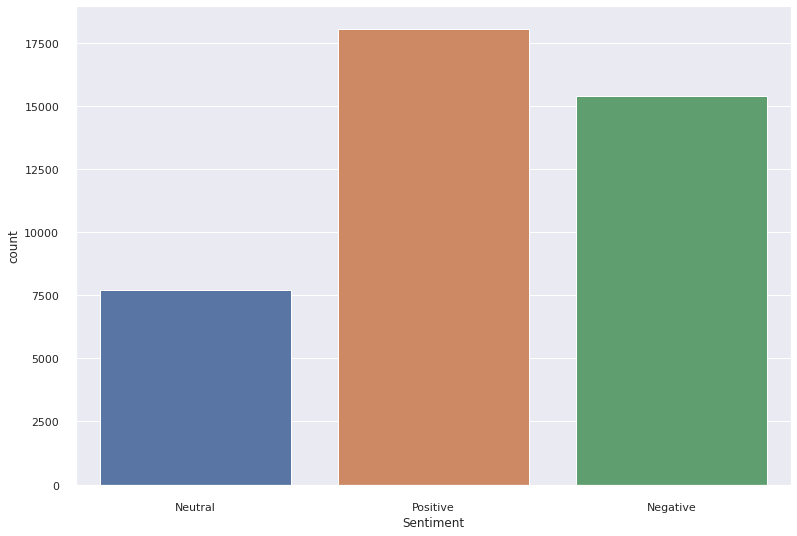

In [52]:
# count plot for Sentiments
sns.countplot(x = tweet_df['Sentiment'])

## Plotting the length of the tweets

Text(0.5, 0, 'Length')

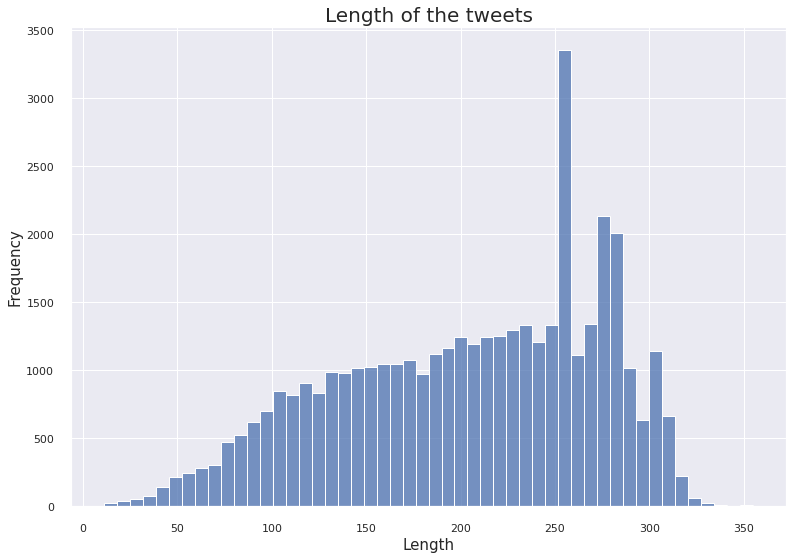

In [53]:
# setting seaborn plotting aesthetics for creating a bar chart
sns.histplot(
    x = tweet_df['OriginalTweet'].str.len(),
    bins = 50
)
plt.title('Length of the tweets', fontsize = 20)
plt.ylabel('Frequency', fontsize = 15)
plt.xlabel('Length', fontsize = 15)

Inference: <br>
From the histogram we deduce, the maximum number of tweets has a length of around 250.

### Fetching year and month from TweetAt column

In [54]:
# converting Date into datetime
tweet_df['TweetAt'] = tweet_df['TweetAt'].apply(lambda x: dt.strptime(x, "%d-%m-%Y"))

In [55]:
# fetching year and month
tweet_df['year'] = tweet_df['TweetAt'].dt.year
tweet_df['month'] = tweet_df['TweetAt'].dt.month

In [56]:
# count of tweets per year
tweet_df['year'].value_counts()

2020    41157
Name: year, dtype: int64

In [57]:
# count of tweets per month
tweet_df['month'].value_counts()

3    25499
4    15658
Name: month, dtype: int64

Inference: Tweets were from 2020 for the month of March and April.

In [58]:
# Count of tweets per month for every sentiment
tweets_per_month = tweet_df.groupby(['month', 'Sentiment'], as_index = False).agg({'UserName': 'count'}).rename(columns = {'UserName' : 'frequency'})
tweets_per_month

,month,Sentiment,frequency
0,3,Negative,9905
1,3,Neutral,4586
2,3,Positive,11008
3,4,Negative,5493
4,4,Neutral,3127
5,4,Positive,7038


Text(0, 0.5, 'Count of tweets')

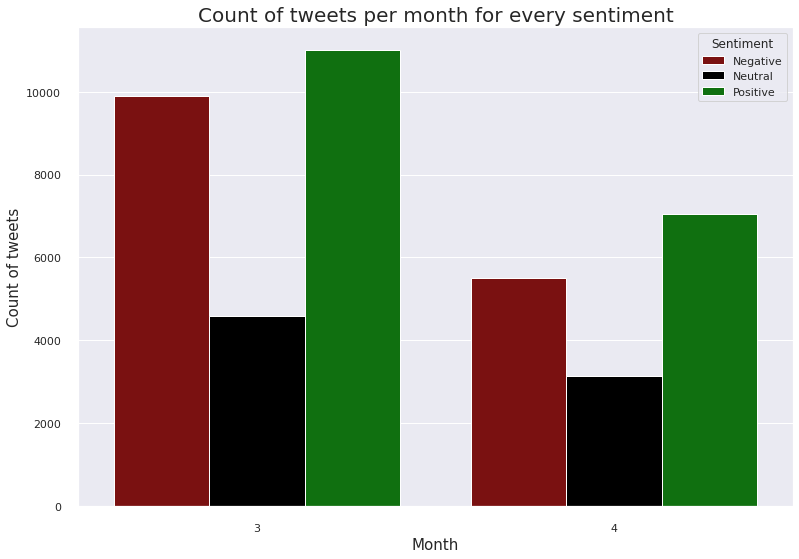

In [59]:
# setting seaborn plotting aesthetics for creating a grouped bar chart
sns.barplot(
    x = 'month',
    y = 'frequency',
    hue = 'Sentiment',
    data = tweets_per_month,
    palette = (['darkred', 'black', 'green'])
)
plt.title('Count of tweets per month for every sentiment', fontsize = 20)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Count of tweets', fontsize = 15)

From the above chart we notice:


*   People tweeted more in March than in April.
*   During both months people tweeted positive tweets more than negative tweets although the difference is not that high.




## Location-wise count of tweets

In [60]:
# Getting top 10 location-wise count of tweets
location_counts = tweet_df.groupby(['Location'], as_index = False).agg({'UserName': 'count'}).sort_values('UserName', ascending = False).rename(columns = {'UserName' : 'frequency'})[0:11]
location_counts

,Location,frequency
5690,London,540
10455,United States,528
5765,"London, England",520
7091,"New York, NY",395
10793,"Washington, DC",373
10433,United Kingdom,337
5872,"Los Angeles, CA",281
4729,India,268
10282,UK,232
1149,Australia,225


In [61]:
# Adding frequency of London and London, England
location_counts.loc[5765, ['frequency']] = location_counts.loc[5690, 'frequency'] + location_counts.loc[5765, 'frequency']
# Adding frequency of United Kingdom and UK
location_counts.loc[10433, ['frequency']] = location_counts.loc[10433, 'frequency'] + location_counts.loc[10282, 'frequency']
# Adding frequency of United States and USA
location_counts.loc[10455, ['frequency']] = location_counts.loc[10455, 'frequency'] + location_counts.loc[10342, 'frequency']
# Dropping these duplicate rows
location_counts.drop(index = [5690, 10282, 10342], inplace = True)

In [62]:
# sorting tweets count in descending order
location_counts.sort_values('frequency', ascending = False, inplace = True)

Text(0, 0.5, 'Count of tweets')

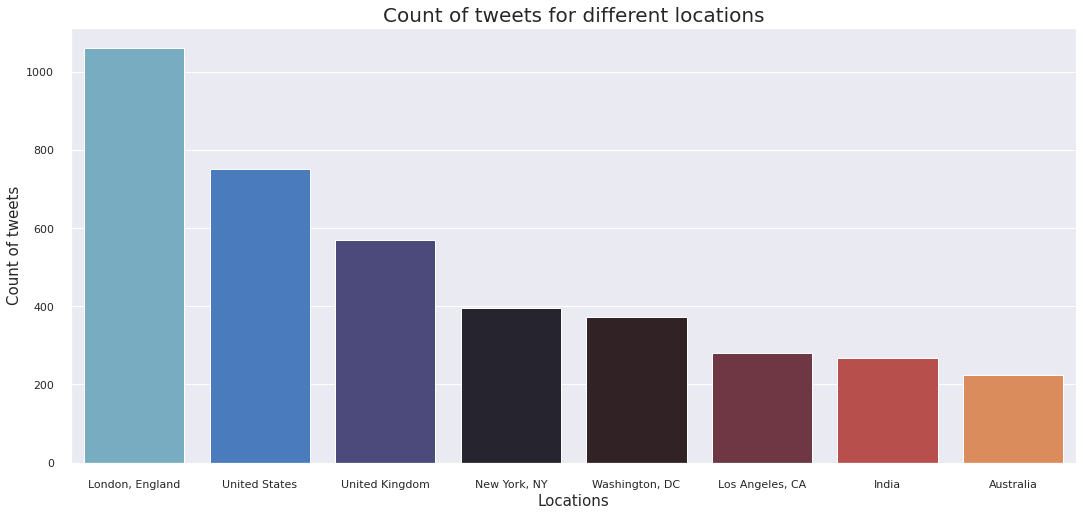

In [63]:
# plotting number of tweets location-wise
fig, ax = plt.subplots(figsize = (18, 8))
sns.barplot(
    x = 'Location',
    y = 'frequency',
    data = location_counts,
    palette = ('icefire')
)
plt.title('Count of tweets for different locations', fontsize = 20)
plt.xlabel('Locations', fontsize = 15)
plt.ylabel('Count of tweets', fontsize = 15)

Inference: <br>
We can see from the graph that maximum number of tweets are from London (England) and United States

## Understanding the sentiment of the tweets for various locations

In [31]:
# Creating the dataframe that contains location wise count of tweets for every sentiment
def tweets_sentiment_wise_per_location(location_list):

  df_list = []
  
  for location in location_list:
    location_df = tweet_df[tweet_df['Location'] == location].groupby(['Location', 'Sentiment'], as_index = False).agg({'UserName': 'count'}).sort_values('UserName', ascending = False).rename(columns = {'UserName' : 'frequency'})
    df_list.append(location_df)

  return pd.concat(df_list, ignore_index = True)

In [32]:
tweets_count = tweets_sentiment_wise_per_location(['London, England', 'United States', 'Australia', 'India', 'Canada'])
tweets_count

,Location,Sentiment,frequency
0,"London, England",Positive,218
1,"London, England",Negative,195
2,"London, England",Neutral,107
3,United States,Positive,245
4,United States,Negative,171
5,United States,Neutral,112
6,Australia,Negative,88
7,Australia,Positive,87
8,Australia,Neutral,50
9,India,Positive,116


Text(0, 0.5, 'Count of tweets')

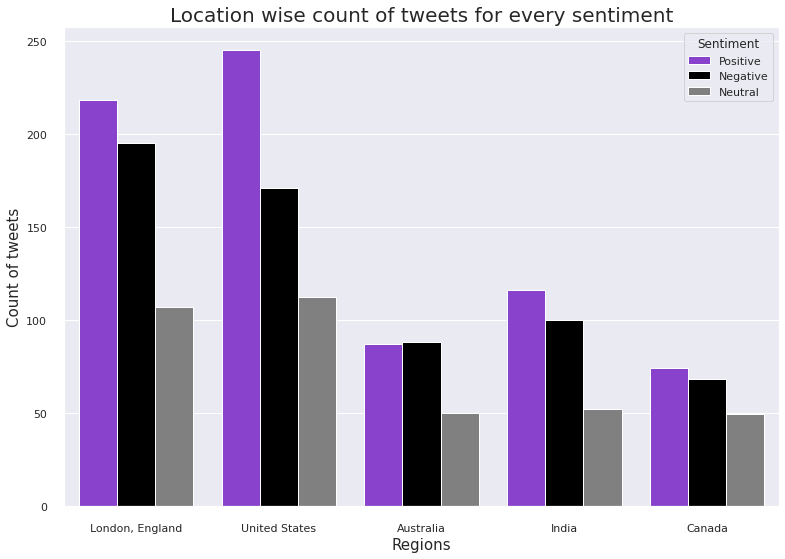

In [33]:
# setting seaborn plotting aesthetics for creating a grouped bar chart
sns.barplot(
    x = 'Location',
    y = 'frequency',
    hue = 'Sentiment',
    data = tweets_count,
    palette = ['blueviolet', 'black', 'grey']
)
plt.title('Location wise count of tweets for every sentiment', fontsize = 20)
plt.xlabel('Regions', fontsize = 15)
plt.ylabel('Count of tweets', fontsize = 15)

Inference: <br>


*   For all the countries except Australia, positive tweets are more in comparison to negative tweets.
*   For Australia, negative and positive tweets are almost the same.
*   Neutral tweets are the lowest for all the countries.



## <b> Text Pre-processing </b>

### Removing punctuation

In [34]:
# Writing a function which removes punctuation from our data
def remove_punc(text):
  no_punc = [char for char in text if char not in string.punctuation]
  return ''.join(no_punc)

In [35]:
tweet_df['TokenizedTweet'] = tweet_df['OriginalTweet'].apply(remove_punc)

In [36]:
tweet_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,year,month,TokenizedTweet
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,2020,3,MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa...
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,2020,3,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,2020,3,Coronavirus Australia Woolworths to give elder...
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,2020,3,My food stock is not the only one which is emp...
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Negative,2020,3,Me ready to go at supermarket during the COVID...


### Removing stopwords

In [37]:
# Writing a function which removes stopwords from our data
def remove_stopwords(text):
    no_stop_words = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return ' '.join(no_stop_words)

In [38]:
tweet_df['TokenizedTweet'] = tweet_df['TokenizedTweet'].apply(remove_stopwords)

In [39]:
tweet_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,year,month,TokenizedTweet
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,2020,3,MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa...
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,2020,3,advice Talk neighbours family exchange phone n...
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,2020,3,Coronavirus Australia Woolworths give elderly ...
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,2020,3,food stock one empty PLEASE dont panic ENOUGH ...
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Negative,2020,3,ready go supermarket COVID19 outbreak Im paran...


<br>

## Creating a word cloud to visualize commonly used words in tweets
After removing punctuations and stopwords from the tweets we want to know which words are mostly used by the people.

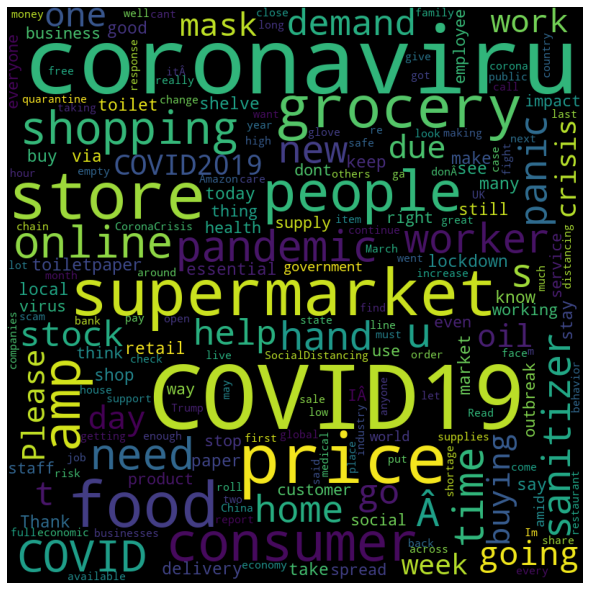

In [ ]:
# Creating a string of words present in all the tweets
total_words = ''
for text in tweet_df['TokenizedTweet']:
  total_words += ' '.join([word for word in text.split()]) + ' '

# Generating a word cloud image
wordcloud = WordCloud(collocations = False, width = 800, height = 800, background_color = 'black', min_font_size = 10).generate(total_words)

# Displaying the generated word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

#### Inference:
#### We can see some of the most frequently used words in tweets like COVID19, coronavirus, store, grocery, shopping, people, supermarket, price etc. as people were mainly concerned about food supplies.

### Stemming - 
Cropping words for space optimization. We will use SnowballStemmer for that.

In [40]:
# Creating an object of SnowballStemmer
stemmer = SnowballStemmer("english")

# Function for stemming each word of the given text
def stemming(text):
    text = [stemmer.stem(word) for word in text.split()]
    return ' '.join(text)

In [41]:
tweet_df['TokenizedTweet'] = tweet_df['TokenizedTweet'].apply(stemming)

In [42]:
tweet_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,year,month,TokenizedTweet
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,2020,3,menyrbi philgahan chrisitv httpstcoifz9fan2pa ...
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,2020,3,advic talk neighbour famili exchang phone numb...
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,2020,3,coronavirus australia woolworth give elder dis...
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,2020,3,food stock one empti pleas dont panic enough f...
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Negative,2020,3,readi go supermarket covid19 outbreak im paran...


## **Splitting data into train and test set**

In [43]:
# fetching independent variables
X = tweet_df['TokenizedTweet']

In [44]:
# fetching dependent variable
y = tweet_df['Sentiment']

In [45]:
# Splitting the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1) 
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(32925,) (32925,) (8232,) (8232,)


## <b> Vectorization </b>

In [46]:
# creating an object of TfidfVectorizer
tf_idf = TfidfVectorizer()

In [47]:
# applying tf idf to training and test data
X_train_tf = tf_idf.fit_transform(X_train)
X_test_tf = tf_idf.transform(X_test)

# **Models for classification**

### Implementing Logistic Regression

In [48]:
# creating an object of LogisticRegression
logistic = LogisticRegression()

In [55]:
# dictionary for LogisticRegression parameters
param_dict_lr = {
    'C': [1e-2, 1e-1, 1, 10, 1e+2],
    'solver': ['newton-cg', 'saga', 'lbfgs'],
    'max_iter': [100, 500, 1000]
}

#### Using GridSearchCV for hyperparameter tuning

In [ ]:
# applying GridSearchCV for hyperparameter tuning
log_reg = GridSearchCV(logistic, param_dict_lr, cv = 5, verbose = 0)
# fitting logistic regression on training dataset
log_reg.fit(X_train_tf, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100.0],
                         'max_iter': [100, 500, 1000],
                         'solver': ['newton-cg', 'saga', 'lbfgs']})

In [ ]:
# finding the best values of hyperparameters
print("The best-fit values are found to be: ", log_reg.best_params_)

The best-fit values are found to be:  {'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}


In [60]:
# model score for test dataset
print('Model score for test data: ', log_reg.best_estimator_.score(X_test_tf, y_test))

Model score for test data:  0.7967687074829932


### Implementing Random Forest Classifier

In [57]:
# creating an object of RandomForestClassifier
rf = RandomForestClassifier()

In [58]:
# fitting RandomForestClassifier on training dataset
rf.fit(X_train_tf, y_train)

RandomForestClassifier()

In [61]:
# model score for test dataset
print('Model score for test data:  : ', rf.score(X_test_tf, y_test))

Model score for test data:  :  0.7360301263362488


### Implementing XGBoost Classifier

In [62]:
# creating an object of XGBClassifier
xgb = XGBClassifier(objective = 'multi:softmax', nthread = 4, seed = 0)

In [67]:
# dictionary for XGBClassifier parameters
param_dict_xgb = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.05, 0.01, 0.005]
}

#### Using RandomizedSearchCV for hyperparameter tuning

In [ ]:
# applying RandomizedSearchCV for hyperparameter tuning
xgb_clf = RandomizedSearchCV(estimator = xgb, param_distributions = param_dict_xgb, cv = 5)
# fitting XGBClassifier on training dataset
xgb_clf.fit(X_train_tf, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(objective='multi:softprob', seed=0),
                   param_distributions={'learning_rate': [0.1, 0.05, 0.01,
                                                          0.005],
                                        'max_depth': range(2, 10),
                                        'n_estimators': range(60, 220, 40)})

In [219]:
# finding the best values of hyper parameters
print("The best-fit values are found to be: ", xgb_clf.best_params_)

The best-fit values are found to be:  {'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1}


In [68]:
# model score for test dataset
print('Model score for test data: ', xgb_clf.best_estimator_.score(X_test_tf, y_test))

Model score for test data:  0.6965500485908649


### Implementing Naive Bayes Classifier

In [69]:
# creating an object of MultinomialNB
multinomial_nb = MultinomialNB()

In [70]:
# fitting naive bayes classifier on training dataset
multinomial_nb.fit(X_train_tf, y_train)

MultinomialNB()

In [71]:
# model score for test dataset
print('Model score for test data: ', multinomial_nb.score(X_test_tf, y_test))

Model score for test data:  0.6338678328474247


### Implementing Support vector machine

In [72]:
# creating an object of Support Vector Classifier
svc = SVC()

In [73]:
# fitting SVC on training dataset
svc.fit(X_train_tf, y_train)

SVC()

In [74]:
# model score for test dataset
print('Model score for test data: ', svc.score(X_test_tf, y_test))

Model score for test data:  0.7844995140913509


## Performance metrics for classification models

In [75]:
models = [log_reg, rf, xgb_clf, multinomial_nb, svc]

In [76]:
# function for calculating evaluation metrics for all the models
def model_metric(models, X_train, y_train, X_test, y_test):
  
  cols = ['Model name', 'Train accuracy', 'Test accuracy', 'Train precision', 'Test precision', 'Train recall', 'Test recall', 'Train f1 score', 'Test f1 score']
  # creating a dataframe that will contain models' evaluation metrics
  model_df = pd.DataFrame(columns = cols)
  
  for model in models:

    # predicting on training and test set
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # fetching model name 
    try:
      model_name = str(model.estimator).partition('(')[0]
    except AttributeError:
      model_name = model.__class__.__name__

    # creating dictionary of evaluation metrics for a model
    df = {
      'Model name': model_name,
      'Train accuracy': accuracy_score(y_train, y_train_pred).round(2),
      'Test accuracy': accuracy_score(y_test, y_test_pred).round(2),
      'Train precision': precision_score(y_train, y_train_pred, average = 'weighted').round(2),
      'Test precision': precision_score(y_test, y_test_pred, average = 'weighted').round(2),
      'Train recall': recall_score(y_train, y_train_pred, average = 'weighted').round(2),
      'Test recall': recall_score(y_test, y_test_pred, average = 'weighted').round(2),
      'Train f1 score': f1_score(y_train, y_train_pred, average = 'weighted').round(2),
      'Test f1 score': f1_score(y_test, y_test_pred, average = 'weighted').round(2)
    }

    # appending the dictionary to the model_df dataframe
    model_df = model_df.append(df, ignore_index = True)

  # returning the dataframe that contains evaluation metrics for all the models
  return model_df

In [77]:
model_df = model_metric(models, X_train_tf, y_train, X_test_tf, y_test)
model_df

,Model name,Train accuracy,Test accuracy,Train precision,Test precision,Train recall,Test recall,Train f1 score,Test f1 score
0,LogisticRegression,0.95,0.80,0.95,0.79,0.95,0.80,0.95,0.79
1,RandomForestClassifier,1.00,0.74,1.00,0.74,1.00,0.74,1.00,0.73
2,XGBClassifier,0.73,0.70,0.73,0.70,0.73,0.70,0.72,0.69
3,MultinomialNB,0.73,0.63,0.79,0.70,0.73,0.63,0.67,0.57
4,SVC,0.98,0.78,0.98,0.78,0.98,0.78,0.98,0.78


Inference: <br>


*   Logistic regression has performed slightly better than the Support Vector Classifier and got the highest accuracy of around 80%.

*   Multinomial Naive Bayes performed the worst with an f1 score of just 0.57.


<br>

# Conclusion:

*   #### Around the globe, people tweeted positive tweets more in comparison to negative and neutral tweets.

*   #### Most of the tweets’ length was around 250 which means there was a high curiosity among the people related to COVID-19.

*   #### People tweeted more in March than in April as many countries imposed lockdown during this period.

*   #### The maximum number of tweets were from London (England) followed by the United States.

*   #### During the pandemic, we saw mixed reactions from Australia as the count of positive and negative tweets were almost the same.


*   #### Most of the tweets contain words like COVID19, grocery, supermarket, store, price etc. which shows during the pandemic, people were mainly concerned about food supplies and their prices.


*   #### Logistic regression has performed the best as it has got the highest accuracy, precision and recall values with a decent f1-score.

*   #### Support Vector Classifier also performed well with not much of a difference in performance from logistic regression.

*   #### Multinomial Naive Bayes is the worst performer which means the assumption of independence among the variables does not hold for this dataset.


